In [44]:
import numpy as np
#import os

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from astropy.io import fits

from setup import *
from FullFrame import FullFrame

from scipy.interpolate import interp1d

##--------------------------------------------------------------------------##
##             NECESSARY USER INPUTS BELOW....                              ##
##--------------------------------------------------------------------------##
##################
###   Hats8b   ###
##################
obs_date1='ut20170723'                           #observation date
obs_date2='ut20170828'#
obj_name='Hats8'                                #object name  

midtime1=['2017-07-24T05:28:01.056']                 #time of midtransit, Hats-8b, Transit 1
midtime2=['2017-08-29T01:36:04.608']                 #time of midtransit, Hats-8b Transit 2

path1='/Volumes/ermay_ext/Magellan/'+obs_date1+'/'
path2='/Volumes/ermay_ext/Magellan/'+obs_date2+'/'
# data_path=path+obj_name+'_Spec/'      #path to where your data is saved
# flat_path=path+obj_name+'_Flats/'     #path to where your SLIT flats are saved
# DARKS=path+obj_name+'_Darks/'     #path to where your darks are saved
# FLATS=path+'Full_Flats/'             #path to where the full field flats are saved 
# WAVE=path+obj_name+'_Arcs/'

#SAVEPATH='SaveData/'+obj_name+'/'
SAVEPATH1=path1+'SaveData_'+obj_name+'_ap5/'
SAVEPATH2=path2+'SaveData_'+obj_name+'/'


extray=400 #number of extra pixels to extract per side in y direction
extrax=80  #number on the side to find wavelength strip, only for nights with a single mask

binn=1    #binning
#### CHECK BINNING IN SETUP.PY ####
#### if 1x1 binning, xpixels,ypixels should be 2048,4096
#### if 2x2 binning, xpixels,ypixels should be 1024,2048
print xpixels/binn, ypixels/binn


from matplotlib.font_manager import FontProperties

params = {'font.family': 'serif',}
matplotlib.rcParams.update(params)

import os

2048 4096


In [47]:
width=400
#em=10.

bin_counts_1=np.load(SAVEPATH1+'Binned_Data_'+str(int(width))+'.npz')['bin_counts']  #[n_exp,numbins,n_obj]
bin_counts_200_1=np.load(SAVEPATH1+'Binned_Data_200.npz')['bin_counts']  #[n_exp,numbins,n_obj]

bin_ctr_200_1=np.load(SAVEPATH1+'LC_bins_br_200.npz')['bin_ctr']
rp_200_1=np.empty([len(bin_ctr_200_1)])
rp_e_200_1=np.empty([len(bin_ctr_200_1)])

bin_ctr_1=np.load(SAVEPATH1+'LC_bins_br_'+str(int(width))+'.npz')['bin_ctr']
rp_1=np.empty([len(bin_ctr_1)])
rp_e_1=np.empty([len(bin_ctr_1)])

rpwhite_1=(np.load(SAVEPATH1+'LightCurve_fits_white.npz')['params'])[2]

yerr_binns_1=np.load(SAVEPATH1+'LC_bins_br_'+str(int(width))+'.npz')['rmse']
yerr_binns_200_1=np.load(SAVEPATH1+'LC_bins_br_200.npz')['rmse']

###########

bin_counts_2=np.load(SAVEPATH2+'Binned_Data_'+str(int(width))+'.npz')['bin_counts']  #[n_exp,numbins,n_obj]
bin_counts_200_2=np.load(SAVEPATH2+'Binned_Data_200.npz')['bin_counts']  #[n_exp,numbins,n_obj]

bin_ctr_200_2=np.load(SAVEPATH2+'LC_bins_br_200.npz')['bin_ctr']
rp_200_2=np.empty([len(bin_ctr_200_2)])
rp_e_200_2=np.empty([len(bin_ctr_200_2)])

bin_ctr_2=np.load(SAVEPATH2+'LC_bins_br_'+str(int(width))+'.npz')['bin_ctr']
rp_2=np.empty([len(bin_ctr_2)])
rp_e_2=np.empty([len(bin_ctr_2)])

rpwhite_2=(np.load(SAVEPATH2+'LightCurve_fits_white.npz')['params'])[2]

yerr_binns_2=np.load(SAVEPATH2+'LC_bins_br_'+str(int(width))+'.npz')['rmse']
yerr_binns_200_2=np.load(SAVEPATH2+'LC_bins_br_200.npz')['rmse']

###############
for b in range(0,len(bin_ctr_1)):
    filen='LightCurve_fits_'+str(int(bin_ctr_1[b]))+'.npz'
    rp_1[b]=(np.load(SAVEPATH1+'Fits_'+str(int(width))+'/'+filen)['params'][2])
    rp_e_1[b]=np.nanmedian((np.load(SAVEPATH1+'Fits_'+str(int(width))+'/'+filen)['paramserr'])[0,0])
    
for b in range(0,len(bin_ctr_200_1)):
    filen='LightCurve_fits_'+str(int(bin_ctr_200_1[b]))+'.npz'
    rp_200_1[b]=(np.load(SAVEPATH1+'Fits_200/'+filen)['params'][2])
    rp_e_200_1[b]=np.nanmedian((np.load(SAVEPATH1+'Fits_200/'+filen)['paramserr'])[0,0])

    
for b in range(0,len(bin_ctr_2)):
    filen='LightCurve_fits_'+str(int(bin_ctr_2[b]))+'.npz'
    rp_2[b]=(np.load(SAVEPATH2+'Fits_'+str(int(width))+'/'+filen)['params'][2])
    rp_e_2[b]=np.nanmedian((np.load(SAVEPATH2+'Fits_'+str(int(width))+'/'+filen)['paramserr'])[0,0])
    
for b in range(0,len(bin_ctr_200_2)):
    filen='LightCurve_fits_'+str(int(bin_ctr_200_2[b]))+'.npz'
    rp_200_2[b]=(np.load(SAVEPATH2+'Fits_200/'+filen)['params'][2])
    rp_e_200_2[b]=np.nanmedian((np.load(SAVEPATH2+'Fits_200/'+filen)['paramserr'])[0,0])

In [48]:
Datal=np.load(SAVEPATH1+'Binned_Data_'+str(int(width))+'.npz')['bin_counts']

print Datal.shape
print np.sqrt(1./Datal[0,:,5])


print yerr_binns_1
print rp_e_1

(8, 72, 9)
[0.00466096 0.00467501 0.00466411 0.00465823 0.00466539 0.00466626
 0.0046618  0.00465788 0.00465919 0.00465874 0.00465306 0.00465396
 0.00465619 0.00465473 0.00465781 0.00465636 0.00465245 0.00464632
 0.00464678 0.00465359 0.00465912 0.00466917 0.00465402 0.00465612
 0.00466142 0.00464168 0.00464653 0.00464033 0.00465092 0.00465354
 0.00465515 0.00465353 0.00465214 0.00465169 0.00465109 0.00465353
 0.00465278 0.00465073 0.00465664 0.00466378 0.00465988 0.00466274
 0.00466213 0.0046651  0.00466338 0.00466307 0.00466254 0.00465392
 0.00465371 0.00465237 0.00465905 0.00465352 0.00466172 0.00466297
 0.004667   0.00465239 0.0046571  0.00467382 0.00467289 0.00467683
 0.00468429 0.00468283 0.00467481 0.00468626 0.00468593 0.00469414
 0.00470004 0.00470142 0.00471269 0.00470997 0.00471882 0.00472244]
[0.00137547 0.00045091 0.0006444  0.00062858 0.00065709 0.00086533
 0.00079591 0.00109098 0.00131429]
[0.00509418 0.00494286 0.0051143  0.00495736 0.00565093 0.00557881
 0.00660491 0.0

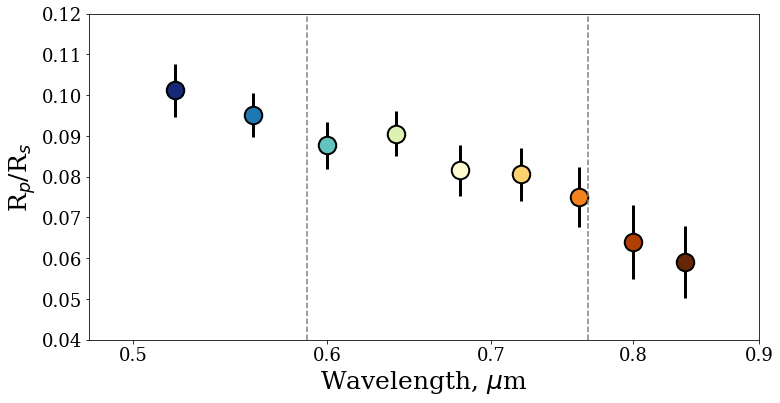

In [49]:
colors1 = plt.cm.YlGnBu_r(np.linspace(0, 1, 128))
colors2 = plt.cm.YlOrBr(np.linspace(0., 1, 128))
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

norm=matplotlib.colors.Normalize(vmin=np.min(bin_ctr_200_1),vmax=np.max(bin_ctr_200_1))                                                                                                                 
colors=mymap
scal_m=matplotlib.cm.ScalarMappable(cmap=colors,norm=norm)
scal_m.set_array([])

plt.figure(101,figsize=(12,6))
for b in range(0,len(bin_ctr_1)):
    plt.errorbar(np.log10(bin_ctr_1[b]),rp_1[b],yerr=rp_e_1[b]+yerr_binns_1[b],color='black',elinewidth=3.0,capsize=0.0,capthick=2.0,zorder=0)
    plt.plot(np.log10(bin_ctr_1[b]),rp_1[b],'.',markerfacecolor=scal_m.to_rgba(bin_ctr_1[b]),
             markeredgecolor='black',markeredgewidth=2.0,markersize=35,zorder=1)


plt.axvline(x=np.log10(5890),linestyle='--',color='grey')
plt.axvline(x=np.log10(7665),linestyle='--',color='grey')

plt.xticks(np.log10([4000,5000,6000,7000,8000,9000]),['0.4','0.5','0.6','0.7','0.8','0.9'],fontsize=18)
plt.xlim(np.log10(4800),np.log10(9000))
plt.xlabel('Wavelength, $\mu$m',fontsize=25)

plt.yticks(fontsize=18)
plt.ylim(0.04,0.12)
plt.ylabel('R$_p$/R$_s$',fontsize=25)

plt.legend(loc='lower left',fontsize=15,frameon=False)

plt.show()
    

In [ ]:
## pad values.

if bin_ctr_200_1[-1]<bin_ctr_200_2[-1]:
    ind=np.where((bin_ctr_200_2-bin_ctr_200_1[-1])>0)
    bin_ctr_200=np.append(bin_ctr_200_1,bin_ctr_200_2[ind])
    
    radsex=np.empty([len(ind)])*np.nan
    rp_200_1=np.append(rp_200_1,radsex)
    
    print bin_ctr_200,rp_200_1
    
if bin_ctr_1[-1]<bin_ctr_2[-1]:
    ind=np.where((bin_ctr_2-bin_ctr_1[-1])>0)
    bin_ctr=np.append(bin_ctr_1,bin_ctr_2[ind])
    
    radsex=np.empty([len(ind)])*np.nan
    rp_1=np.append(rp_1,radsex)
    
    print bin_ctr,rp_1


In [8]:
def ComNights(x,dx,y,dy):
    d=np.zeros_like(x)
    dd=np.zeros_like(x)
    for i in range(0,len(d)):
        d[i]=np.nansum([x[i]/dx[i]**2.,y[i]/dy[i]**2.])/np.nansum([1./dx[i]**2.,1./dy[i]**2.])
        dd[i]=np.sqrt(1./np.nansum([1./dx[i]**2.,1./dy[i]**2.]))
    return d,dd

rp_200,rp_e_200=ComNights(rp_200_1,rp_e_200_1,rp_200_2,rp_e_200_2)

IndexError: index 17 is out of bounds for axis 0 with size 17

[4700. 4900. 5100. 5300. 5500. 5700. 5900. 6100. 6300. 6500. 6700. 6900.
 7100. 7300. 7500. 7700. 7900. 8100. 8300. 8500. 8700. 8900. 9100.]
23


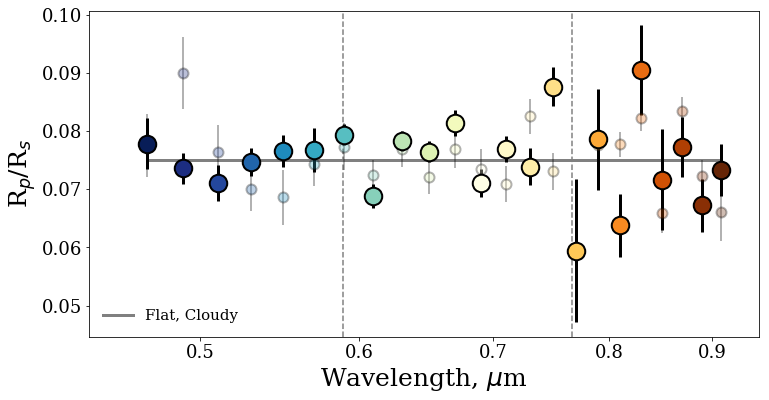

In [30]:
###WASP 4b
plt_wid=100
#em=10.

print bin_ctr

rpwhite=(rpwhite_1+rpwhite_2)/2.

##################################################################################
colors1 = plt.cm.YlGnBu_r(np.linspace(0, 1, 128))
colors2 = plt.cm.YlOrBr(np.linspace(0., 1, 128))
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

norm=matplotlib.colors.Normalize(vmin=np.min(bin_ctr_200_1),vmax=np.max(bin_ctr_200_1))                                                                                                                 
colors=mymap
scal_m=matplotlib.cm.ScalarMappable(cmap=colors,norm=norm)
scal_m.set_array([])
##################################################################################

print len(bin_ctr)
            
owave=np.logspace(4000,9000,1000)

wavelog=np.log(bin_ctr_200)
rays=np.polyfit(wavelog,rp_200,1)
ray=(np.poly1d(rays))(wavelog)

lins=np.polyfit(wavelog,rp_200,0)
lin=(np.poly1d(lins))(wavelog)


###########################
#sys.path.insert(0,SAVEPATH) 
#from SystemCons import *

alpha=-4.
kb=1.380658*10**-16   #boltzmann constant, erg/K
mh=1.6726*10**-24     #mass of hydrogen in g
muj=2.3                #mu of jupiter

# Rs is in cm

#-----W4, int=0.1735
Rs=6.4*10**10.
Tplan=1324.   #temperature of planet in K
gplan=448.87   # gravity in cm/s^2

slope=(alpha/Rs)*(kb*Tplan)/((muj*mh)*gplan)
raya=(np.poly1d([slope,rpwhite]))(wavelog)
#########################

chi_rayfit=np.nansum((ray-rp_200)**2.)
chi_flat=np.nansum((lin-rp_200)**2.)
chi_act=np.nansum((raya-rp_200)**2.)

xerr1=np.abs(np.log(bin_ctr/(bin_ctr-width/2.)))
xerr2=np.abs(np.log(bin_ctr_200/(bin_ctr_200+100.)))
                
            
            
plt.figure(figsize=(12,6)) 
#plt.figure(figsize=(8,10.5)) #full page size
#plt.figure(figsize=(8,5.25)) #half page size

plt.plot(wavelog,lin,color='grey',linewidth=3.0,linestyle='-',label='Flat, Cloudy')
#plt.plot(wavelog,raya-rpwhite,color='grey',linewidth=3.0,linestyle='--', label='Nominal Rayleigh')


for b in range(0,len(bin_ctr_200)):
#     if b==14 or b==15:
#         continue
    plt.plot(np.log(bin_ctr_200[b]),rp_200[b],'.', markeredgewidth=2.0,markersize=35,markeredgecolor='black', markerfacecolor=scal_m.to_rgba(bin_ctr_200[b]),zorder=11)
    plt.errorbar(np.log(bin_ctr_200[b]),rp_200[b],yerr=rp_e_200[b]+yerr_binns_200[b],color='black',elinewidth=3.0,capsize=0.0,capthick=2.0,zorder=10)

for b in range(0,len(bin_ctr)):
#     if plt_wid==100:
#         if b==29 or b==30:
#             continue
    plt.plot(np.log(bin_ctr[b]),rp[b],'.', markeredgewidth=2.0,markersize=20,markeredgecolor='black', markerfacecolor=scal_m.to_rgba(bin_ctr[b]),zorder=10,alpha=0.3)
    plt.errorbar(np.log(bin_ctr[b]),rp[b],yerr=rp_e[b]+yerr_binns[b],color='black',elinewidth=2.0,capsize=0.0,capthick=2.0,zorder=10,alpha=0.3)


plt.axvline(x=np.log(5890),linestyle='--',color='grey')
plt.axvline(x=np.log(7665),linestyle='--',color='grey')

plt.xticks(np.log([4000,5000,6000,7000,8000,9000]),['0.4','0.5','0.6','0.7','0.8','0.9'],fontsize=18,fontproperties=font)
plt.xlim(np.log(4400),np.log(9500))

#plt.ylim(-0.0085,0.0085)

plt.legend(loc='lower left',fontsize=15,frameon=False)

plt.yticks(fontsize=18,fontproperties=font)
plt.ylabel('R$_p$/R$_s$',fontsize=25,fontproperties=font)


plt.xlabel('Wavelength, $\mu$m',fontsize=25,fontproperties=font)
plt.show()
#plt.savefig(SAVEPATH+'PLOTS/TSpec_alldata'+str(int(width))+'.pdf')


In [31]:
width=200

SAVEPATH=np.copy(SAVEPATH1)

import os
import matplotlib.colors as mcolors

dat=np.load(SAVEPATH+'LC_bins_br_'+str(int(width))+'.npz')
bin_ctr=dat['bin_ctr']
n_bins=len(bin_ctr)

lc_data_white=np.load(SAVEPATH+'LCwhite_br.npz')['data']

t=np.load(SAVEPATH+'Obs_times.npz')['times']
n_exp=len(t)

###############
colors1 = plt.cm.YlGnBu_r(np.linspace(0, 1, 128))
colors2 = plt.cm.YlOrBr(np.linspace(0., 1, 128))
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

norm=matplotlib.colors.Normalize(vmin=np.min(bin_ctr),vmax=np.max(bin_ctr))                                                                                                                 
colors=mymap
scal_m=matplotlib.cm.ScalarMappable(cmap=colors,norm=norm)
scal_m.set_array([])
################

lc_fit=np.empty([n_exp,n_bins])
lc_data=np.empty([n_exp,n_bins])

#b=0
lcwhite=(np.load(SAVEPATH+'LightCurve_fits_white.npz')['lightcurve_fit'])
t0=-1.0*(np.load(SAVEPATH+'LightCurve_fits_white.npz')['params'])[0]
for b in range(0,len(bin_ctr)):
    filen='LightCurve_fits_'+str(int(bin_ctr[b]))+'.npz'
    if filen in os.listdir(SAVEPATH+'Fits_'+str(int(width))+'/'):
        lc_fit[:,b]=(np.load(SAVEPATH+'Fits_'+str(int(width))+'/'+filen)['lightcurve_fit'])

###########################
fig,ax=plt.subplots(1,2,figsize=(8,10.5)) #full page rotated
fig.subplots_adjust(wspace=0, hspace=0)
plt.gcf().subplots_adjust(bottom=0.12,top=0.95,left=0.15,right=0.86)

shift=0
dv=45.

ymin=0.98
ymax=1.37

shift=0
for b in range(n_bins-1,-1,-1):
    ax[0].plot(24*(t[:-2]+t0),lc_fit[:-2,b]+shift,'-',color='grey')
    ax[0].plot(24*(t[:-2]+t0),(lc_data_binns[:-2,b])+shift,'.',markersize=8,markeredgecolor='black',markeredgewidth=0.5,markerfacecolor=scal_m.to_rgba(bin_ctr[b]))
    shift+=0.75*(n_bins/dv)/(n_bins+1.)
ax[0].set_ylim(ymin,ymax)
ax[0].yaxis.set_tick_params(labelsize=18)
ax[0].xaxis.set_tick_params(labelsize=18)
ax[0].set_ylabel('Relative Flux + shift',fontsize=25)
ax[0].set_title('Light Curves',fontsize=20)  

shift=0
for b in range(n_bins-1,-1,-1):
    ax[1].plot(24*(t[:-2]+t0),(lc_data_binns[:-2,b]-lc_fit[:-2,b]+shift),'.',markersize=8,markeredgecolor='black',markeredgewidth=0.5,markerfacecolor=scal_m.to_rgba(bin_ctr[b]))
    shift+=0.75*(n_bins/dv)/(n_bins+1.)
ax[1].set_ylim(ymin-1.0,ymax-1.0)
ax[1].set_yticks([])
ax[1].xaxis.set_tick_params(labelsize=18)
ax[1].set_title('Residuals',fontsize=20)  

plt.figtext(0.5,0.06,'Time from Center of Transit [hrs]',fontsize=25,ha='center')
plt.figtext(0.2,0.2,'HATS-8b ut20170722',fontsize=15,ha='center')

shift=0
for b in range(n_bins-1,-1,-1):
    plt.figtext(0.865,0.16+2.13*shift,str(int(bin_ctr[b]))+'$\AA$',color='black',fontsize=15)
    shift+=0.75*(n_bins/dv)/(n_bins+1.)

#plt.savefig(SAVEPATH+'PLOTS/all_lcs_err_'+str(int(width))+'_new.pdf')    
plt.show()

In [ ]:
width=200

SAVEPATH=np.copy(SAVEPATH2)

import os
import matplotlib.colors as mcolors

dat=np.load(SAVEPATH+'LC_bins_br_'+str(int(width))+'.npz')
bin_ctr=dat['bin_ctr']
n_bins=len(bin_ctr)

lc_data_white=np.load(SAVEPATH+'LCwhite_br.npz')['data']

t=np.load(SAVEPATH+'Obs_times.npz')['times']
n_exp=len(t)

###############
colors1 = plt.cm.YlGnBu_r(np.linspace(0, 1, 128))
colors2 = plt.cm.YlOrBr(np.linspace(0., 1, 128))
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

norm=matplotlib.colors.Normalize(vmin=np.min(bin_ctr),vmax=np.max(bin_ctr))                                                                                                                 
colors=mymap
scal_m=matplotlib.cm.ScalarMappable(cmap=colors,norm=norm)
scal_m.set_array([])
################

lc_fit=np.empty([n_exp,n_bins])
lc_data=np.empty([n_exp,n_bins])

#b=0
lcwhite=(np.load(SAVEPATH+'LightCurve_fits_white.npz')['lightcurve_fit'])
t0=-1.0*(np.load(SAVEPATH+'LightCurve_fits_white.npz')['params'])[0]
for b in range(0,len(bin_ctr)):
    filen='LightCurve_fits_'+str(int(bin_ctr[b]))+'.npz'
    if filen in os.listdir(SAVEPATH+'Fits_'+str(int(width))+'/'):
        lc_fit[:,b]=(np.load(SAVEPATH+'Fits_'+str(int(width))+'/'+filen)['lightcurve_fit'])

###########################
fig,ax=plt.subplots(1,2,figsize=(8,10.5)) #full page rotated
fig.subplots_adjust(wspace=0, hspace=0)
plt.gcf().subplots_adjust(bottom=0.12,top=0.95,left=0.15,right=0.86)

shift=0
dv=45.

ymin=0.98
ymax=1.37

shift=0
for b in range(n_bins-1,-1,-1):
    ax[0].plot(24*(t[:-2]+t0),lc_fit[:-2,b]+shift,'-',color='grey')
    ax[0].plot(24*(t[:-2]+t0),(lc_data_binns[:-2,b])+shift,'.',markersize=8,markeredgecolor='black',markeredgewidth=0.5,markerfacecolor=scal_m.to_rgba(bin_ctr[b]))
    shift+=0.75*(n_bins/dv)/(n_bins+1.)
ax[0].set_ylim(ymin,ymax)
ax[0].yaxis.set_tick_params(labelsize=18)
ax[0].xaxis.set_tick_params(labelsize=18)
ax[0].set_ylabel('Relative Flux + shift',fontsize=25)
ax[0].set_title('Light Curves',fontsize=20)  

shift=0
for b in range(n_bins-1,-1,-1):
    ax[1].plot(24*(t[:-2]+t0),(lc_data_binns[:-2,b]-lc_fit[:-2,b]+shift),'.',markersize=8,markeredgecolor='black',markeredgewidth=0.5,markerfacecolor=scal_m.to_rgba(bin_ctr[b]))
    shift+=0.75*(n_bins/dv)/(n_bins+1.)
ax[1].set_ylim(ymin-1.0,ymax-1.0)
ax[1].set_yticks([])
ax[1].xaxis.set_tick_params(labelsize=18)
ax[1].set_title('Residuals',fontsize=20)  

plt.figtext(0.5,0.06,'Time from Center of Transit [hrs]',fontsize=25,ha='center')
plt.figtext(0.2,0.2,'HATS-8b ut20170811',fontsize=15,ha='center')


shift=0
for b in range(n_bins-1,-1,-1):
    plt.figtext(0.865,0.16+2.13*shift,str(int(bin_ctr[b]))+'$\AA$',color='black',fontsize=15)
    shift+=0.75*(n_bins/dv)/(n_bins+1.)

#plt.savefig(SAVEPATH+'PLOTS/all_lcs_err_'+str(int(width))+'_new.pdf')    
plt.show()

In [38]:
#5=c1 6=c2
SAVEPATH=np.copy(SAVEPATH1)

bin_ctr_200=np.load(SAVEPATH+'LC_bins_br_200.npz')['bin_ctr']

nbins=len(bin_ctr_200)


fit_c1=np.empty([nbins])*0.0
fit_c2=np.empty([nbins])*0.0

c1_err=np.empty([nbins])*0.0
c2_err=np.empty([nbins])*0.0

import os

b=0
for file in os.listdir(SAVEPATH+'Fits_200/'):
    if file.endswith('.npz'):
        if b==len(bin_ctr_200):
            print b, file
#            c1_white=(np.load(SAVEPATH+'Fits_200/'+file)['params'])[5]
#            c2_white=(np.load(SAVEPATH+'Fits_200/'+file)['params'])[6]
        else:
            fit_c1[b]=(np.load(SAVEPATH+'Fits_200/'+file)['params'])[5]
            fit_c2[b]=(np.load(SAVEPATH+'Fits_200/'+file)['params'])[6]
            c1_err[b]=np.nanmedian((np.load(SAVEPATH+'Fits_200/'+file)['paramserr'])[1])
            c2_err[b]=np.nanmedian((np.load(SAVEPATH+'Fits_200/'+file)['paramserr'])[2])
            b+=1

ft_c='tomato'

#_ac is CLARET TABLES
#_ft is FIT VALUES

c1_ft=fit_c1
c2_ft=fit_c2

c1_ac=np.array([0.9459,0.7502,0.5424,0.4330,0.3385,0.1813])#,0.0640,0.0683] #Quad Limb Dark 1
c2_ac=np.array([-0.0850,0.0799,0.2060,0.2443,0.2528,0.2953])#,0.3519,0.2893] #Quad Limb Dark 2  
wave=[3640,4450,5510,6580,8060,12200]

bins=bin_ctr_200

from matplotlib.font_manager import FontProperties
font0=FontProperties()
font=font0.copy()
font.set_family('serif')

fontb=font.copy()
fontb.set_weight('bold')

plt.gcf().subplots_adjust(bottom=0.28,top=0.95,left=0.18,right=0.99)

plt.plot(wave,c1_ac,color='black')
plt.plot(bins,c1_ft,color=ft_c)
plt.plot(wave,c1_ac,'o',color='black')
plt.plot(bins,c1_ft,'o',color=ft_c)

plt.plot(wave,c2_ac,color='black')
plt.plot(bins,c2_ft,color=ft_c)
plt.plot(wave,c2_ac,'v',color='black')
plt.plot(bins,c2_ft,'v',color=ft_c)

plt.fill_between(bins,c1_ft-c1_err,c1_ft+c1_err,color=ft_c,alpha=0.3)
plt.fill_between(bins,c2_ft-c2_err,c2_ft+c2_err,color=ft_c,alpha=0.3)


plt.figtext(0.95,0.87,'Claret et al. (2011) Values',color='black',fontsize=15,ha='right',fontproperties=font)
plt.figtext(0.95,0.80,'Returned Parameters',color=ft_c,fontsize=15,ha='right',fontproperties=font)
plt.figtext(0.2,0.6,'q0 $\\bullet$',color='black',fontsize=15,fontproperties=font)
plt.figtext(0.2,0.53,'q1 $\\blacktriangledown$',color='black',fontsize=15,fontproperties=font)

plt.figtext(0.95,0.3,'HATS-8b',color='black',ha='right',fontsize=15,fontproperties=fontb)

plt.xticks(fontproperties=font,fontsize=15,rotation='vertical')
plt.yticks(fontproperties=font,fontsize=15)

plt.xlabel('Wavelength, $\mathrm{\AA}$',fontproperties=font,fontsize=20)
plt.ylabel('Limb Darkening',fontproperties=font,fontsize=20)

plt.xlim(3500,8500)

#plt.savefig(SAVEPATH+'PLOTS/Claret_vs_fit_limbdark.pdf')
plt.show()

[0.69380007 0.67364615 0.69839091 0.56611862 0.55723103 0.56857293
 0.50912717 0.53851021 0.46973748 0.40903712 0.39288531 0.40709118
 0.36765563 0.35638995 0.30847163 0.38378975 0.30849369 0.32546199
 0.26012349 0.3738033  0.35545096 0.2655395  0.28700154]
[0.09980403 0.14572079 0.22812622 0.16306173 0.21488704 0.25651366
 0.22835195 0.2848527  0.24382562 0.21006659 0.21315063 0.23374486
 0.20937438 0.22090073 0.18631505 0.27586057 0.21131457 0.24494956
 0.19574121 0.30211983 0.29290789 0.22039088 0.25240942]
[0.06629071 0.05972172 0.04419696 0.05662945 0.05993413 0.05840413
 0.04771863 0.04829354 0.04816425 0.04885103 0.0523674  0.06278554
 0.0544041  0.06346394 0.04657171 0.07022152 0.06383332 0.06975185
 0.05246535 0.06324594 0.06879758 0.06371307 0.06791631]
[0.06481756 0.0595852  0.03278    0.05702985 0.06034436 0.05411271
 0.04896577 0.04086066 0.04996552 0.04830601 0.05093272 0.06159648
 0.0512544  0.06222731 0.03833003 0.06585899 0.05811935 0.06817646
 0.04989302 0.06060968 0.

In [ ]:
#5=c1 6=c2
SAVEPATH=np.copy(SAVEPATH2)

bin_ctr_200=np.load(SAVEPATH+'LC_bins_br_200.npz')['bin_ctr']
nbins=len(bin_ctr_200)

fit_c1=np.empty([nbins])*0.0
fit_c2=np.empty([nbins])*0.0

c1_err=np.empty([nbins])*0.0
c2_err=np.empty([nbins])*0.0

import os

b=0
for file in os.listdir(SAVEPATH+'Fits_200/'):
    if file.endswith('.npz'):
        if b==len(bin_ctr_200):
            print b, file
#            c1_white=(np.load(SAVEPATH+'Fits_200/'+file)['params'])[5]
#            c2_white=(np.load(SAVEPATH+'Fits_200/'+file)['params'])[6]
        else:
            fit_c1[b]=(np.load(SAVEPATH+'Fits_200/'+file)['params'])[5]
            fit_c2[b]=(np.load(SAVEPATH+'Fits_200/'+file)['params'])[6]
            c1_err[b]=np.nanmedian((np.load(SAVEPATH+'Fits_200/'+file)['paramserr'])[1])
            c2_err[b]=np.nanmedian((np.load(SAVEPATH+'Fits_200/'+file)['paramserr'])[2])
            b+=1

ft_c='tomato'

#_ac is CLARET TABLES
#_ft is FIT VALUES

c1_ft=fit_c1
c2_ft=fit_c2

c1_ac=np.array([0.9459,0.7502,0.5424,0.4330,0.3385,0.1813])#,0.0640,0.0683] #Quad Limb Dark 1
c2_ac=np.array([-0.0850,0.0799,0.2060,0.2443,0.2528,0.2953])#,0.3519,0.2893] #Quad Limb Dark 2  
wave=[3640,4450,5510,6580,8060,12200]

bins=bin_ctr_200

from matplotlib.font_manager import FontProperties
font0=FontProperties()
font=font0.copy()
font.set_family('serif')

fontb=font.copy()
fontb.set_weight('bold')

plt.gcf().subplots_adjust(bottom=0.28,top=0.95,left=0.18,right=0.99)

plt.plot(wave,c1_ac,color='black')
plt.plot(bins,c1_ft,color=ft_c)
plt.plot(wave,c1_ac,'o',color='black')
plt.plot(bins,c1_ft,'o',color=ft_c)

plt.plot(wave,c2_ac,color='black')
plt.plot(bins,c2_ft,color=ft_c)
plt.plot(wave,c2_ac,'v',color='black')
plt.plot(bins,c2_ft,'v',color=ft_c)

plt.fill_between(bins,c1_ft-c1_err,c1_ft+c1_err,color=ft_c,alpha=0.3)
plt.fill_between(bins,c2_ft-c2_err,c2_ft+c2_err,color=ft_c,alpha=0.3)


plt.figtext(0.95,0.87,'Claret et al. (2011) Values',color='black',fontsize=15,ha='right',fontproperties=font)
plt.figtext(0.95,0.80,'Returned Parameters',color=ft_c,fontsize=15,ha='right',fontproperties=font)
plt.figtext(0.2,0.6,'q0 $\\bullet$',color='black',fontsize=15,fontproperties=font)
plt.figtext(0.2,0.53,'q1 $\\blacktriangledown$',color='black',fontsize=15,fontproperties=font)

plt.figtext(0.95,0.3,'HATS-8b',color='black',ha='right',fontsize=15,fontproperties=fontb)

plt.xticks(fontproperties=font,fontsize=15,rotation='vertical')
plt.yticks(fontproperties=font,fontsize=15)

plt.xlabel('Wavelength, $\mathrm{\AA}$',fontproperties=font,fontsize=20)
plt.ylabel('Limb Darkening',fontproperties=font,fontsize=20)

plt.xlim(3500,8500)

#plt.savefig(SAVEPATH+'PLOTS/Claret_vs_fit_limbdark.pdf')
plt.show()

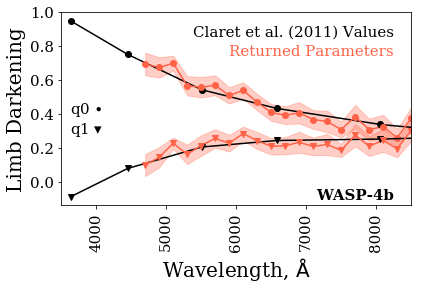

In [ ]:
corr=False
width_bin=200

import scipy.signal

SAVEPATH=np.copy(SAVEPATH1)

cnt_arr=np.load(SAVEPATH+'ShiftedSpec_All.npz')['convolved']
#cnt_arr=np.load(SAVEPATH+'ShiftedSpec_All.npz')['data']
wav_arr=np.load(SAVEPATH+'ShiftedSpec_All.npz')['wave']
#    tot_err=np.load(SAVEPATH+'FlattenedSpectra.npz')['tot_err']
binns=np.load(SAVEPATH+'Binned_Data_'+str(int(width_bin))+'.npz')['bin_counts']
bin_a=np.load(SAVEPATH+'Binned_Data_'+str(int(width_bin))+'.npz')['bins']
bin_c=np.load(SAVEPATH+'Binned_Data_'+str(int(width_bin))+'.npz')['bin_centers']

cnt_arr=np.flip(cnt_arr,axis=2)
wav_arr=np.flip(wav_arr,axis=2)

#Wasp52
#-------
#Cals_ind=[2]
#Cals_ind=[2,3,5,8]  
#csn=2

#Wasp4
#------
#1,4,5,7,8,10,11,12
#USE: 5,
Cals_ind=[5]

#HatP26b
#-----
#1,2,3,4,5,6,7
# X 1
#------
#Cals_ind=[2,3,4,5,6]
#csn=2

#Cals=np.zeros_like(cnt_arr[0,0,:])
#errs_cw_t=np.zeros_like(cnt_arr[0,0,:])
#errs_cw_p=np.zeros_like(cnt_arr[0,0,:])
#for c in Cals_ind:
#    Cals=(np.nansum([Cals,cnt_arr[c,0,:]],axis=0))
#    errs_cw_t=np.sqrt(np.nansum([errs_cw_t,tot_err[c,0,:]**2.],axis=0))
#    errs_cw_p=np.sqrt(np.nansum([errs_cw_p,ptn_err[c,0,:]**2.],axis=0))

plt.figure(figsize=(8,6))

t=10
tar=scipy.signal.medfilt(cnt_arr[0,t,:]/np.nanmax(cnt_arr[0,t,:]),kernel_size=1)

#r1=1865
#r2=1878
#tar[r1:r2+1]=np.nan

tarc='grey'#'#5ab4ac'
calc='tomato'#'#d8b365'

bot=np.argmin(np.abs(wav_arr[0,t,:]-6600))
top=np.argmin(np.abs(wav_arr[0,t,:]-6800))
print bot, top

# med_bin0=np.nanmean(cnt_arr[0,t,bot:top]/np.nanmax(cnt_arr[0,t,:]))
# med_binc=np.nanmean(cnt_arr[c,t,bot:top]/np.nanmax(cnt_arr[c,t,:]))
# print med_bin0, med_binc

#for t in range(0,wav_arr.shape[1]):
plt.plot(wav_arr[0,t,:],tar,linewidth=2.0,color=tarc)
#for p in range(0,len(wav_arr[0,t,:])):
#    plt.annotate(p,xy=(wav_arr[0,t,p],tar[p]))
for c in Cals_ind:
    plt.plot(wav_arr[c,t,:],cnt_arr[c,t,:]/np.nanmax(cnt_arr[0,t,:]),linewidth=1.5,color=calc)

#plt.axvline(x=7593.7,color='grey',linewidth=0.5,linestyle='--')
#plt.axvline(x=6867.19,color='grey',linewidth=0.5,linestyle='--')
#plt.axvline(x=6562.81,color='grey',linewidth=0.5,linestyle='--')
#plt.axvline(x=5895.9,color='grey',linewidth=0.5,linestyle='--')
#plt.axvline(x=5889.9,color='grey',linewidth=0.5,linestyle='--')

for b in range(0,len(bin_a)):
    plt.axvline(x=bin_a[b],color='grey',linewidth=0.5)


    
plt.plot(bin_c,binns[0,t,:]/np.nanmax(binns[0,t,:]),'.',markersize=18,markeredgecolor='black',markerfacecolor=tarc,alpha=0.7)
for c in Cals_ind:
    plt.plot(bin_c,binns[c,t,:]/np.nanmax(binns[0,t,:]),'.',markersize=18,markeredgecolor='black',markerfacecolor=calc,alpha=0.7)                       

plt.xticks([5000,5500,6000,6500,7000,7500,8000],['5000 $\mathrm{\AA}$','','6000 $\mathrm{\AA}$','','7000 $\mathrm{\AA}$','','8000 $\mathrm{\AA}$'],fontsize=15,fontproperties=font)
plt.xlabel('Wavelength',fontsize=20,fontproperties=font)

plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],['0.0','','0.2','','0.4','','0.6','','0.8','','1.0'],fontsize=15,fontproperties=font)
plt.ylabel('Relative Flux',fontsize=20,fontproperties=font)

plt.figtext(0.15,0.23,'HATS-8b',fontsize=25,fontproperties=fontb,color=tarc)
plt.figtext(0.15,0.17,'Reference',fontsize=25,fontproperties=fontb,color=calc)

#plt.figtext(0.15,0.8,'ut20160922',fontsize=15,fontproperties=fontb,color='black')

plt.xlim(4600,8200)

plt.savefig(SAVEPATH+'PLOTS/Spectra_'+str(int(width_bin))+'.pdf')

In [ ]:
corr=False
width_bin=200

import scipy.signal

SAVEPATH=np.copy(SAVEPATH2)

cnt_arr=np.load(SAVEPATH+'ShiftedSpec_All.npz')['convolved']
#cnt_arr=np.load(SAVEPATH+'ShiftedSpec_All.npz')['data']
wav_arr=np.load(SAVEPATH+'ShiftedSpec_All.npz')['wave']
#    tot_err=np.load(SAVEPATH+'FlattenedSpectra.npz')['tot_err']
binns=np.load(SAVEPATH+'Binned_Data_'+str(int(width_bin))+'.npz')['bin_counts']
bin_a=np.load(SAVEPATH+'Binned_Data_'+str(int(width_bin))+'.npz')['bins']
bin_c=np.load(SAVEPATH+'Binned_Data_'+str(int(width_bin))+'.npz')['bin_centers']

cnt_arr=np.flip(cnt_arr,axis=2)
wav_arr=np.flip(wav_arr,axis=2)

#Wasp52
#-------
#Cals_ind=[2]
#Cals_ind=[2,3,5,8]  
#csn=2

#Wasp4
#------
#1,4,5,7,8,10,11,12
#USE: 5,
Cals_ind=[5]

#HatP26b
#-----
#1,2,3,4,5,6,7
# X 1
#------
#Cals_ind=[2,3,4,5,6]
#csn=2

#Cals=np.zeros_like(cnt_arr[0,0,:])
#errs_cw_t=np.zeros_like(cnt_arr[0,0,:])
#errs_cw_p=np.zeros_like(cnt_arr[0,0,:])
#for c in Cals_ind:
#    Cals=(np.nansum([Cals,cnt_arr[c,0,:]],axis=0))
#    errs_cw_t=np.sqrt(np.nansum([errs_cw_t,tot_err[c,0,:]**2.],axis=0))
#    errs_cw_p=np.sqrt(np.nansum([errs_cw_p,ptn_err[c,0,:]**2.],axis=0))

plt.figure(figsize=(8,6))

t=10
tar=scipy.signal.medfilt(cnt_arr[0,t,:]/np.nanmax(cnt_arr[0,t,:]),kernel_size=1)

#r1=1865
#r2=1878
#tar[r1:r2+1]=np.nan

tarc='grey'#'#5ab4ac'
calc='tomato'#'#d8b365'

bot=np.argmin(np.abs(wav_arr[0,t,:]-6600))
top=np.argmin(np.abs(wav_arr[0,t,:]-6800))
print bot, top

# med_bin0=np.nanmean(cnt_arr[0,t,bot:top]/np.nanmax(cnt_arr[0,t,:]))
# med_binc=np.nanmean(cnt_arr[c,t,bot:top]/np.nanmax(cnt_arr[c,t,:]))
# print med_bin0, med_binc

#for t in range(0,wav_arr.shape[1]):
plt.plot(wav_arr[0,t,:],tar,linewidth=2.0,color=tarc)
#for p in range(0,len(wav_arr[0,t,:])):
#    plt.annotate(p,xy=(wav_arr[0,t,p],tar[p]))
for c in Cals_ind:
    plt.plot(wav_arr[c,t,:],cnt_arr[c,t,:]/np.nanmax(cnt_arr[0,t,:]),linewidth=1.5,color=calc)

#plt.axvline(x=7593.7,color='grey',linewidth=0.5,linestyle='--')
#plt.axvline(x=6867.19,color='grey',linewidth=0.5,linestyle='--')
#plt.axvline(x=6562.81,color='grey',linewidth=0.5,linestyle='--')
#plt.axvline(x=5895.9,color='grey',linewidth=0.5,linestyle='--')
#plt.axvline(x=5889.9,color='grey',linewidth=0.5,linestyle='--')

for b in range(0,len(bin_a)):
    plt.axvline(x=bin_a[b],color='grey',linewidth=0.5)


    
plt.plot(bin_c,binns[0,t,:]/np.nanmax(binns[0,t,:]),'.',markersize=18,markeredgecolor='black',markerfacecolor=tarc,alpha=0.7)
for c in Cals_ind:
    plt.plot(bin_c,binns[c,t,:]/np.nanmax(binns[0,t,:]),'.',markersize=18,markeredgecolor='black',markerfacecolor=calc,alpha=0.7)                       

plt.xticks([5000,5500,6000,6500,7000,7500,8000],['5000 $\mathrm{\AA}$','','6000 $\mathrm{\AA}$','','7000 $\mathrm{\AA}$','','8000 $\mathrm{\AA}$'],fontsize=15,fontproperties=font)
plt.xlabel('Wavelength',fontsize=20,fontproperties=font)

plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],['0.0','','0.2','','0.4','','0.6','','0.8','','1.0'],fontsize=15,fontproperties=font)
plt.ylabel('Relative Flux',fontsize=20,fontproperties=font)

plt.figtext(0.15,0.23,'HATS-8b',fontsize=25,fontproperties=fontb,color=tarc)
plt.figtext(0.15,0.17,'Reference',fontsize=25,fontproperties=fontb,color=calc)

#plt.figtext(0.15,0.8,'ut20160922',fontsize=15,fontproperties=fontb,color='black')

plt.xlim(4600,8200)

plt.savefig(SAVEPATH+'PLOTS/Spectra_'+str(int(width_bin))+'.pdf')